In [140]:
#download dataset
import pandas as pd
import numpy as np
import urllib.request
import tarfile
from pathlib import Path

def loadHousingdata():
    tarballPath = Path("datasets/housing.tgz")
    if not tarballPath.is_file():
        Path("datasets").mkdir(parents=True,exist_ok=True)
        datasetURL = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(datasetURL, "housing.tgz")
        with tarfile.open("housing.tgz") as housing_tarball:
            housing_tarball.extractall(path = "datasets")
        
        return pd.read_csv(Path("datasets/housing/housing.csv"))
    


In [141]:
housing = loadHousingdata()

C:\Users\pkmis\AppData\Local\Temp\ipykernel_6016\3340875664.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path = "datasets")


In [142]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [143]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


*Conclusion*

- **total_bedrooms** has only 20433 non nulll values ie. 207 are missing
- **ocean_proximit** only object attribute. some values are repetitive. it should be a categorical value

In [144]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [145]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


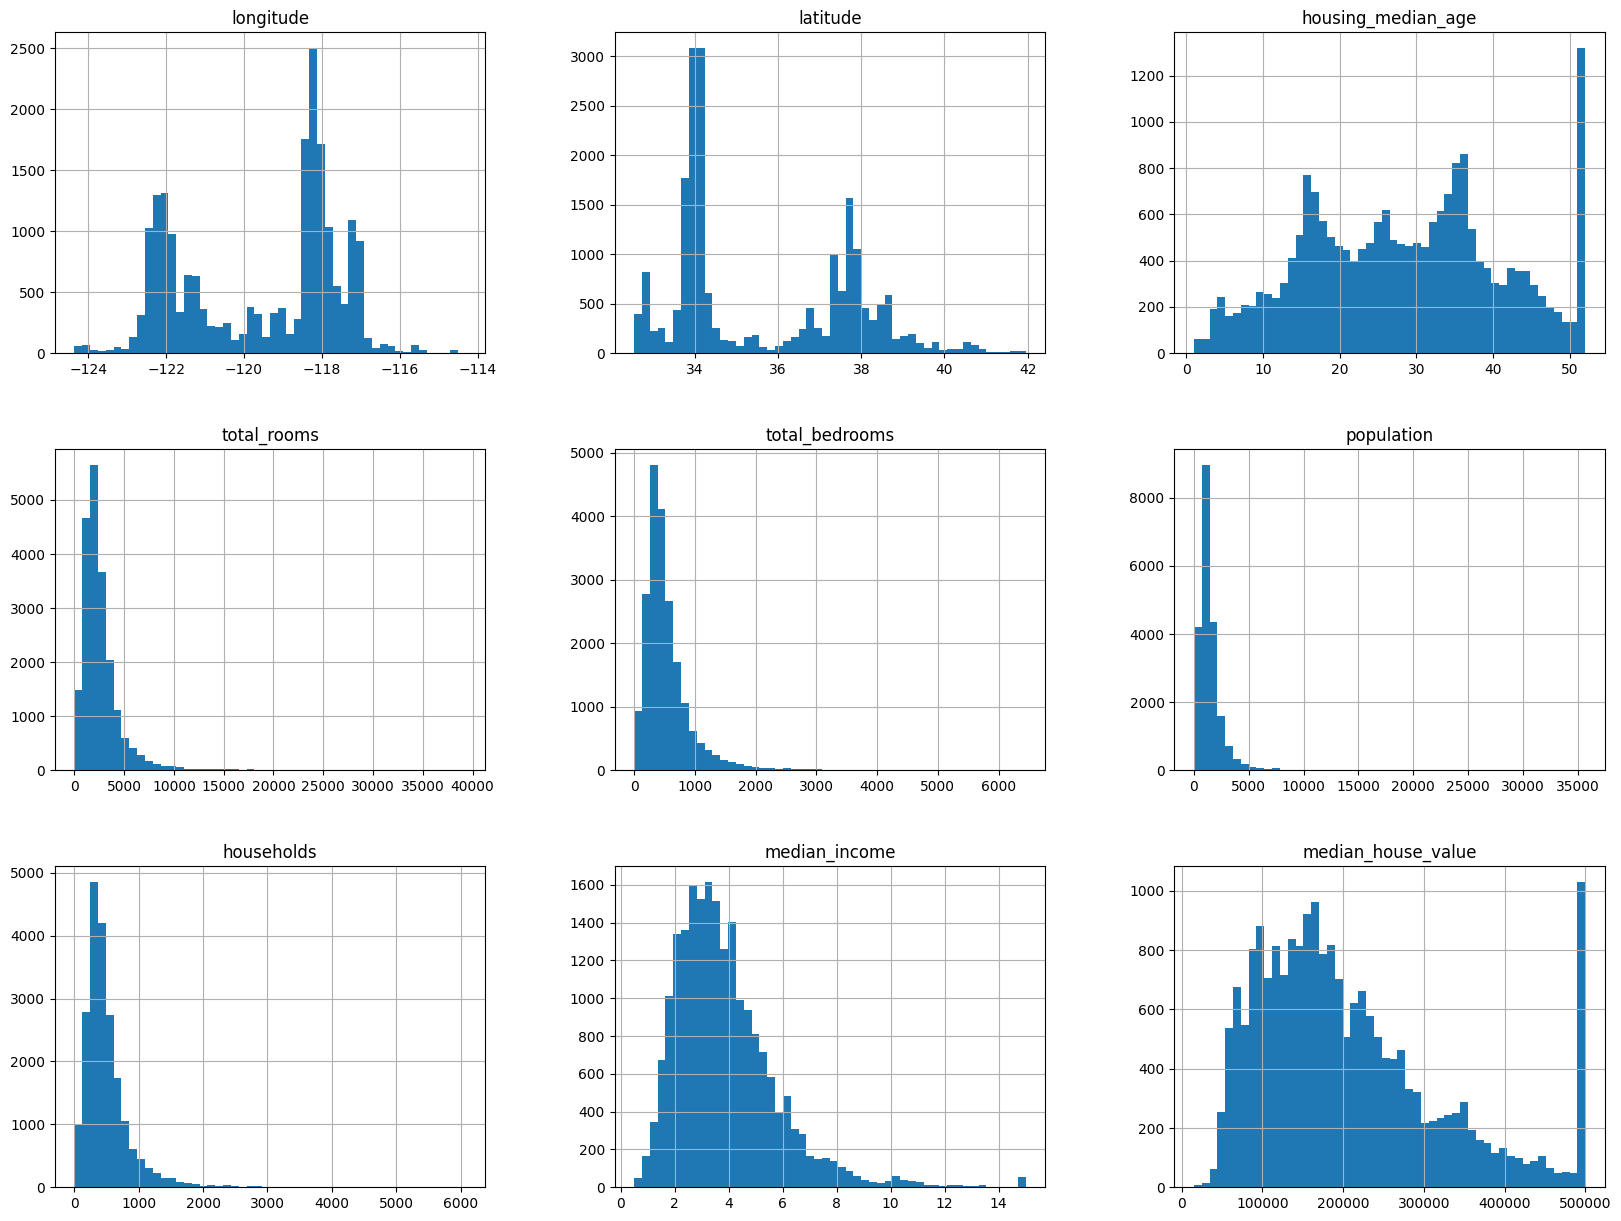

In [146]:
#plot histogram for each numerical values to see the distribution
"""A histogram shows number of instance on y-axis and value range on x-axis"""

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

#### Create Test set
Creating a test set before you start any model training or analysis is essential for obtaining an unbiased and realistic evaluation of your model's performance. It helps you prevent overfitting, avoid data snooping bias, and establish a reliable benchmark for comparing different models.

In [147]:
# create test set and train set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


Now requirement is median income is very importatn to predict median hosuing price.
after watchign the histogram of median income, lets label the categories into five categories

- 1 - 0 to 1.5 (less than $15k)
- 2 - 1.5 to 3 
- 3 - 3 to 4.5
- 4 - 4.5 to 6
- 5 - 6 and more


In [148]:
housing["income_cat"] = pd.cut(housing["median_income"] , bins = [0., 1.5,3,4.5, 5, np.inf], labels=[1,2,3,4,5])

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


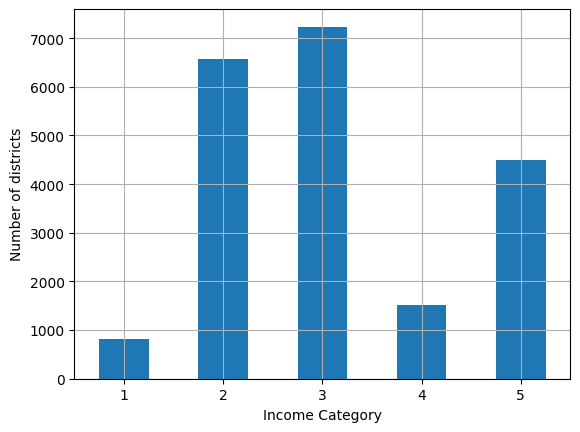

In [149]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

Having multiple splits can be useful if you want to better estimate the performance of our model.

In [150]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

In [151]:
print(len(strat_train_set), "train +", len(strat_test_set), "test")

16512 train + 4128 test


In [152]:
#income category proportion in test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
5    0.217539
4    0.073159
1    0.039971
Name: count, dtype: float64

In [153]:
#income category proportion in full dataset
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
5    0.217490
4    0.073256
1    0.039826
Name: count, dtype: float64

we will not use income category column again, so lets drop and get back the original data

In [154]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Explore and Visualise the data

In [155]:
# make a copy of training dataset
housing = strat_train_set.copy()

In [156]:
housing.shape

(16512, 10)

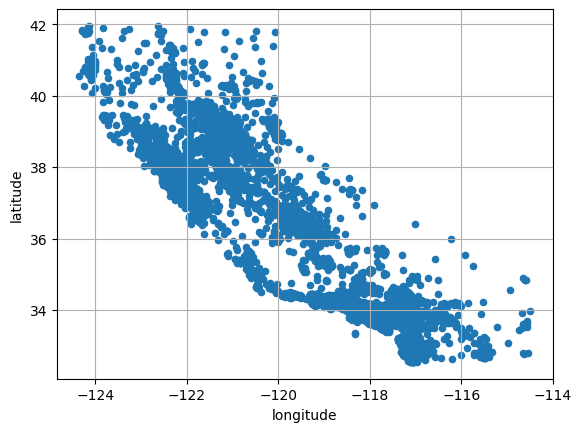

In [157]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid = True)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

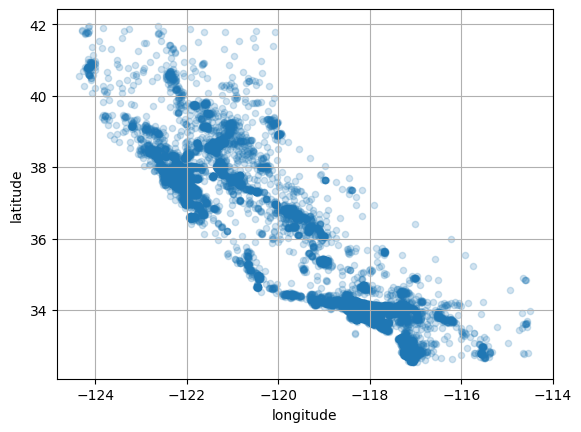

In [158]:
#make alpha=0.2 to see the density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, grid = True)

<Axes: xlabel='longitude', ylabel='latitude'>

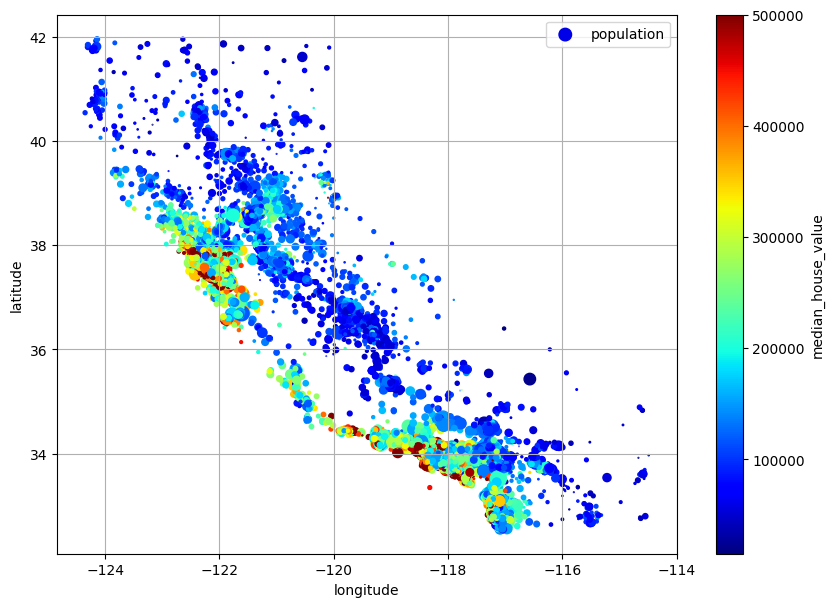

In [159]:
#here radius of circle represents population and color represents price
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap="jet", colorbar=True, grid = True)

here we can see that the houses which are near sea(close to ocean ) has high price (because of sea facing).

Clustering algo should be useful for detecting the main cluster and for adding new feature that measure the proximity to the cluster centers.

### Look for correlation

In [160]:
#correlation matrix
corr_matrix = housing.corr(numeric_only=True)

In [161]:
corr_matrix['median_house_value'].sort_values(ascending=False)  #correlation of each attribute with median house value

median_house_value    1.000000
median_income         0.691701
total_rooms           0.138372
housing_median_age    0.108138
households            0.070919
total_bedrooms        0.053885
population           -0.019877
longitude            -0.050177
latitude             -0.140510
Name: median_house_value, dtype: float64

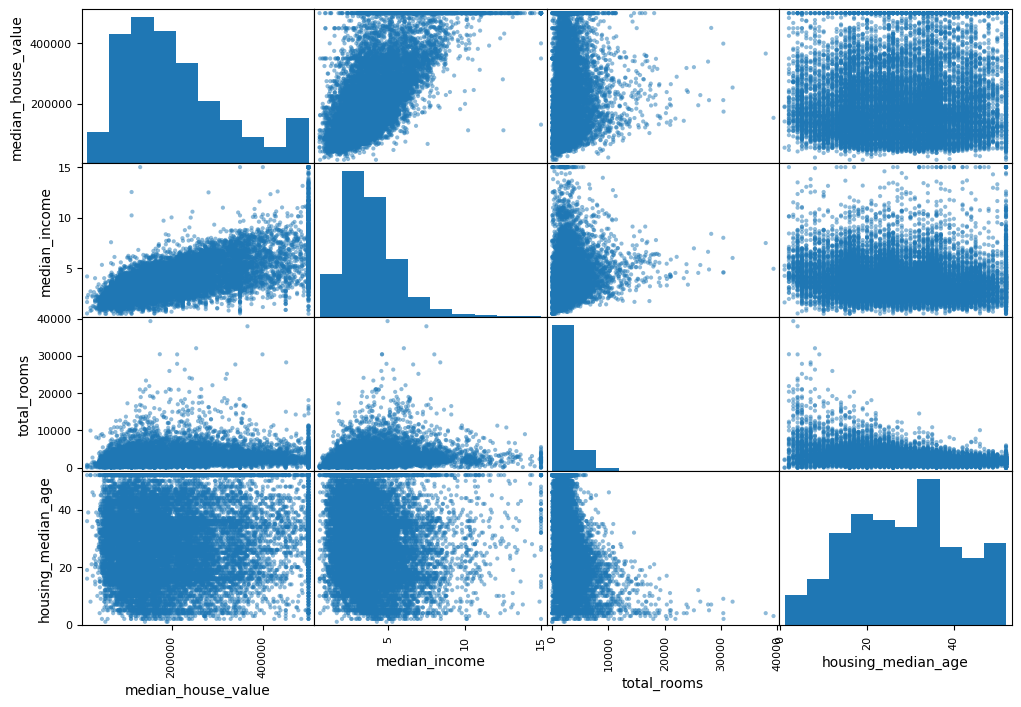

In [162]:
#plot correlation
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()


After loooking the scatter matrix its clear that meadian income is the most promising attribute to predict median house value so lets zoom it

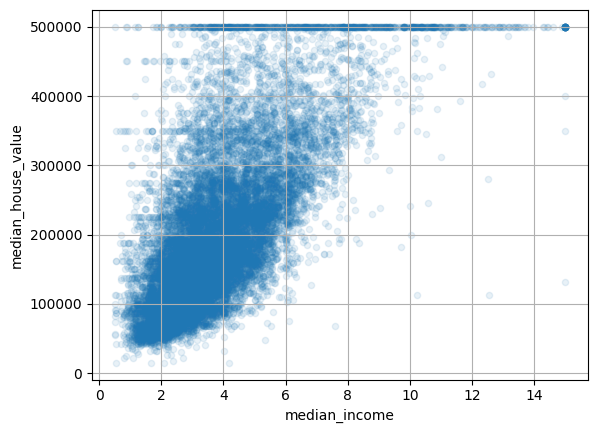

In [163]:
housing.plot(kind="scatter", x = "median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

Conclusion

1. Correlation is strong - upward trend.
2. Price cap is clearly visbile as horizontal line at $50k, one at $45k, $35k and one probably $28k.


we can remove the corresponding districts to prevent the algo from learning to reproduce these data quirks

#### Explore more attributes before preparing data for ML

1. No. of Rooms per household
2. Number of rooms
3. Population per household

In [164]:
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]

In [165]:
housing["bedrooms_ratio"] = housing['total_bedrooms']/housing['total_rooms']
housing["people_per_house"] = housing["population"]/housing["households"]

In [166]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
20217,-121.26,37.95,44.0,819.0,184.0,677.0,183.0,1.7250,59300.0,INLAND,4.475410,0.224664,3.699454
17424,-117.17,32.80,20.0,2827.0,554.0,1822.0,536.0,3.4706,157600.0,NEAR OCEAN,5.274254,0.195967,3.399254
7308,-118.16,34.03,45.0,894.0,231.0,925.0,222.0,2.6042,145000.0,<1H OCEAN,4.027027,0.258389,4.166667
12266,-118.45,34.03,41.0,1240.0,320.0,711.0,304.0,3.3482,318100.0,<1H OCEAN,4.078947,0.258065,2.338816
2244,-122.25,38.10,52.0,1591.0,372.0,817.0,357.0,2.1411,97200.0,NEAR BAY,4.456583,0.233815,2.288515


In [167]:
#again look correlation matrix
corr_matrix = housing.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691701
rooms_per_house       0.147745
total_rooms           0.138372
housing_median_age    0.108138
households            0.070919
total_bedrooms        0.053885
population           -0.019877
people_per_house     -0.033123
longitude            -0.050177
latitude             -0.140510
bedrooms_ratio       -0.262690
Name: median_house_value, dtype: float64

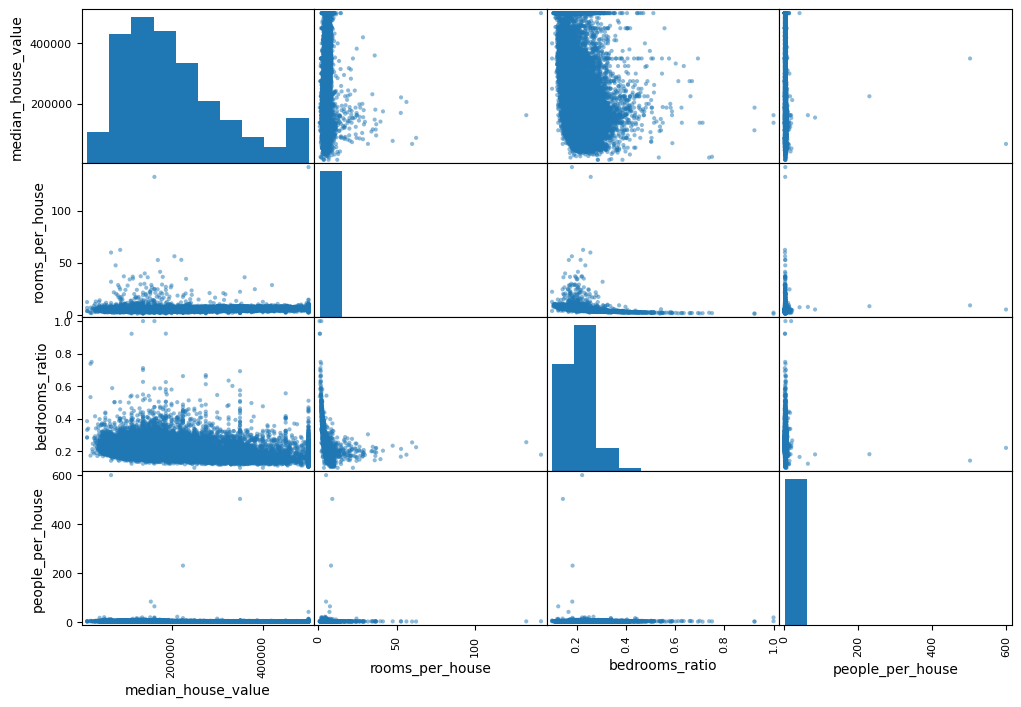

In [168]:
#plot this matrix
attributes = ["median_house_value", "rooms_per_house", "bedrooms_ratio", "people_per_house"]
scatter_matrix(housing[attributes], figsize=(12,8))

plt.show()

# Prepare data for Algo

Before cleaning the data first copy the strat_train_set and remove the target variable from it. 

this will help in separating the target value for cleaning

In [169]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy() 
housing.shape

(16512, 9)

### CLean the data

In [170]:
#Fix the missing values
housing['total_bedrooms'].isnull().sum()

np.int64(174)

to complete the missing values: 
1. get rid of entire row -- dropna()
2. get rid of whole attribute -- drop()
3. set msising values to some value -- fillna()

In [171]:
#lets use option 3 to fill missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")  #median is used because it is robust to outliers


In [172]:
#since median can only be computed on numerical values, we need to only select numerical values

housing_numerical = housing.select_dtypes(include=[np.number])
housing_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20217,-121.26,37.95,44.0,819.0,184.0,677.0,183.0,1.7250
17424,-117.17,32.80,20.0,2827.0,554.0,1822.0,536.0,3.4706
7308,-118.16,34.03,45.0,894.0,231.0,925.0,222.0,2.6042
12266,-118.45,34.03,41.0,1240.0,320.0,711.0,304.0,3.3482
2244,-122.25,38.10,52.0,1591.0,372.0,817.0,357.0,2.1411
...,...,...,...,...,...,...,...,...
2688,-117.27,33.03,25.0,1787.0,311.0,1108.0,311.0,3.9826
20136,-120.76,38.12,7.0,7188.0,1288.0,3175.0,1115.0,3.8488
18739,-122.11,37.37,22.0,1477.0,195.0,520.0,187.0,10.3329
11072,-115.62,33.04,17.0,1009.0,231.0,745.0,217.0,2.0463


In [173]:

# fit the imputer
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [174]:
# compare the imputer's median values with the actual median values

print(imputer.statistics_)
print(housing_numerical.median().values)

[-118.51     34.26     29.     2125.5     433.     1166.      408.
    3.5385]
[-118.51     34.26     29.     2125.5     433.     1166.      408.
    3.5385]


In [175]:
# now lets transform and use the median to fill the missing value and save in X
X = imputer.transform(housing_numerical)
X

array([[-1.21260e+02,  3.79500e+01,  4.40000e+01, ...,  6.77000e+02,
         1.83000e+02,  1.72500e+00],
       [-1.17170e+02,  3.28000e+01,  2.00000e+01, ...,  1.82200e+03,
         5.36000e+02,  3.47060e+00],
       [-1.18160e+02,  3.40300e+01,  4.50000e+01, ...,  9.25000e+02,
         2.22000e+02,  2.60420e+00],
       ...,
       [-1.22110e+02,  3.73700e+01,  2.20000e+01, ...,  5.20000e+02,
         1.87000e+02,  1.03329e+01],
       [-1.15620e+02,  3.30400e+01,  1.70000e+01, ...,  7.45000e+02,
         2.17000e+02,  2.04630e+00],
       [-1.22840e+02,  3.84200e+01,  2.90000e+01, ...,  1.38100e+03,
         5.31000e+02,  2.96250e+00]], shape=(16512, 8))

In [176]:
#convert X into dataframe
housing_tr = pd.DataFrame(X, columns=housing_numerical.columns, index=housing.index)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20217,-121.26,37.95,44.0,819.0,184.0,677.0,183.0,1.7250
17424,-117.17,32.80,20.0,2827.0,554.0,1822.0,536.0,3.4706
7308,-118.16,34.03,45.0,894.0,231.0,925.0,222.0,2.6042
12266,-118.45,34.03,41.0,1240.0,320.0,711.0,304.0,3.3482
2244,-122.25,38.10,52.0,1591.0,372.0,817.0,357.0,2.1411


In [177]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 20217 to 15851
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [178]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

##### Handle Categorical values 

In [179]:
housing_categorical = housing[['ocean_proximity']]
housing_categorical.head()

,ocean_proximity
20217,INLAND
17424,NEAR OCEAN
7308,<1H OCEAN
12266,<1H OCEAN
2244,NEAR BAY


In [180]:
# to convert into numerical we will use Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_categorical)

In [181]:
housing_cat_encoded[:9]

array([[1.],
       [4.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [3.],
       [4.]])

In [182]:
#get unique encoded value
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [183]:
#apply one hot
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_categorical)

In [184]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [185]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], shape=(16512, 5))

In [186]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [187]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [188]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

## Feature Scaling and Transformation



1. Total rooms range: 6 to 39320
2. median income : 0 to 15


2 ways to make same scale
 - *min-max scaling/normalisation*  -- values range from 0 to 1.
    - subtract min value and divide by difference between min and max.
    - sklearn has **MinMaxScaler**
 - *standardization* - no specific range but it is much less affected by outliers
    - subtract mean value and then divide the result by Std deviation. 
    - Mean = 0 and SD = 1
    - sklearn has **StandardScaler**



In [189]:
from sklearn.preprocessing import MinMaxScaler

In [190]:
minmaxScaler = MinMaxScaler(feature_range=(-1,1))
minmaxScaler

MinMaxScaler(feature_range=(-1, 1))

In [191]:
housing_minmax_Scaled = minmaxScaler.fit_transform(housing_numerical)
housing_minmax_Scaled

array([[-0.37322515,  0.14893617,  0.68627451, ..., -0.91731076,
        -0.93205152, -0.83102302],
       [ 0.45638945, -0.94680851, -0.25490196, ..., -0.7768372 ,
        -0.80026134, -0.59025393],
       [ 0.25557809, -0.68510638,  0.7254902 , ..., -0.88688504,
        -0.91749113, -0.70975573],
       ...,
       [-0.54563895,  0.02553191, -0.17647059, ..., -0.9365722 ,
        -0.93055815,  0.35625716],
       [ 0.77079108, -0.89574468, -0.37254902, ..., -0.90896822,
        -0.91935785, -0.78670639],
       [-0.69371197,  0.24893617,  0.09803922, ..., -0.83094099,
        -0.80212806, -0.66033572]], shape=(16512, 8))

### Standard Scaling

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
stdScaler = StandardScaler()
housing_num_stdScaled = stdScaler.fit_transform(housing_numerical)
housing_num_stdScaled

array([[-0.84246504,  1.08320335,  1.21943816, ..., -0.67983272,
        -0.82286412, -1.12281706],
       [ 1.20276693, -1.33189642, -0.68665785, ...,  0.35677199,
         0.09003358, -0.21326302],
       [ 0.70771078, -0.75508618,  1.29885882, ..., -0.45531047,
        -0.72200574, -0.66470529],
       ...,
       [-1.26751325,  0.81121153, -0.52781652, ..., -0.82196978,
        -0.81251967,  3.3623744 ],
       [ 1.97785484, -1.21934808, -0.92491985, ..., -0.61827017,
        -0.7349363 , -0.95540201],
       [-1.63255465,  1.30361052,  0.02812815, ..., -0.04247925,
         0.07710302, -0.47801119]], shape=(16512, 8))

<Axes: >

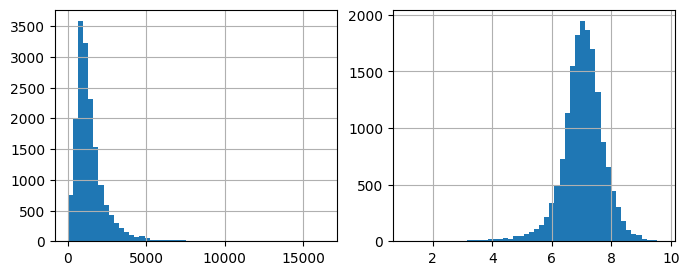

In [194]:
#generate log of numerical values

fig, axs = plt.subplots(1,2, figsize=(8,3))
housing["population"].hist(ax=axs[0], bins=50)
housing['population'].apply(np.log).hist(ax=axs[1], bins=50)


In [195]:
housing_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20217,-121.26,37.95,44.0,819.0,184.0,677.0,183.0,1.7250
17424,-117.17,32.80,20.0,2827.0,554.0,1822.0,536.0,3.4706
7308,-118.16,34.03,45.0,894.0,231.0,925.0,222.0,2.6042
12266,-118.45,34.03,41.0,1240.0,320.0,711.0,304.0,3.3482
2244,-122.25,38.10,52.0,1591.0,372.0,817.0,357.0,2.1411
...,...,...,...,...,...,...,...,...
2688,-117.27,33.03,25.0,1787.0,311.0,1108.0,311.0,3.9826
20136,-120.76,38.12,7.0,7188.0,1288.0,3175.0,1115.0,3.8488
18739,-122.11,37.37,22.0,1477.0,195.0,520.0,187.0,10.3329
11072,-115.62,33.04,17.0,1009.0,231.0,745.0,217.0,2.0463


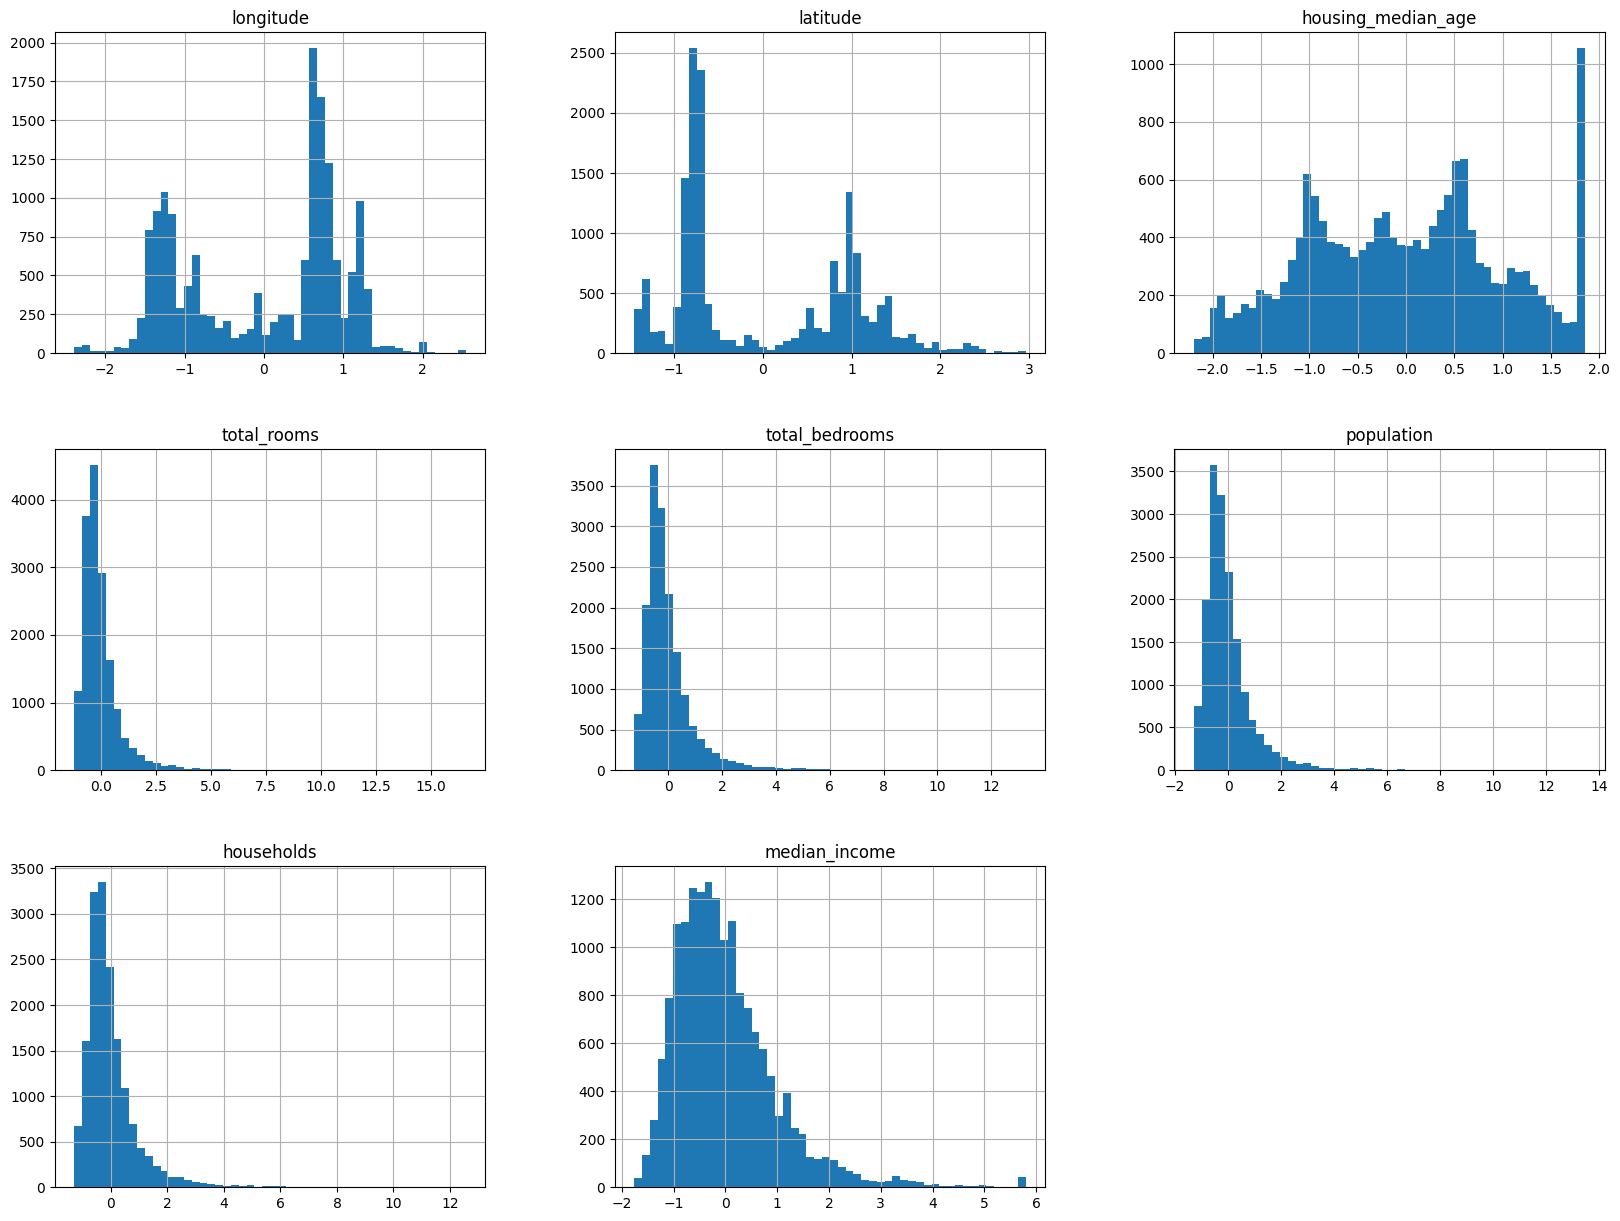

In [196]:
#plot housing_num_stdScaled
housing_num_stdScaled_df = pd.DataFrame(housing_num_stdScaled, columns=housing_numerical.columns, index=housing_numerical.index)
housing_num_stdScaled_df

housing_num_stdScaled_df.hist(bins=50, figsize=(20,15))
plt.show()



array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

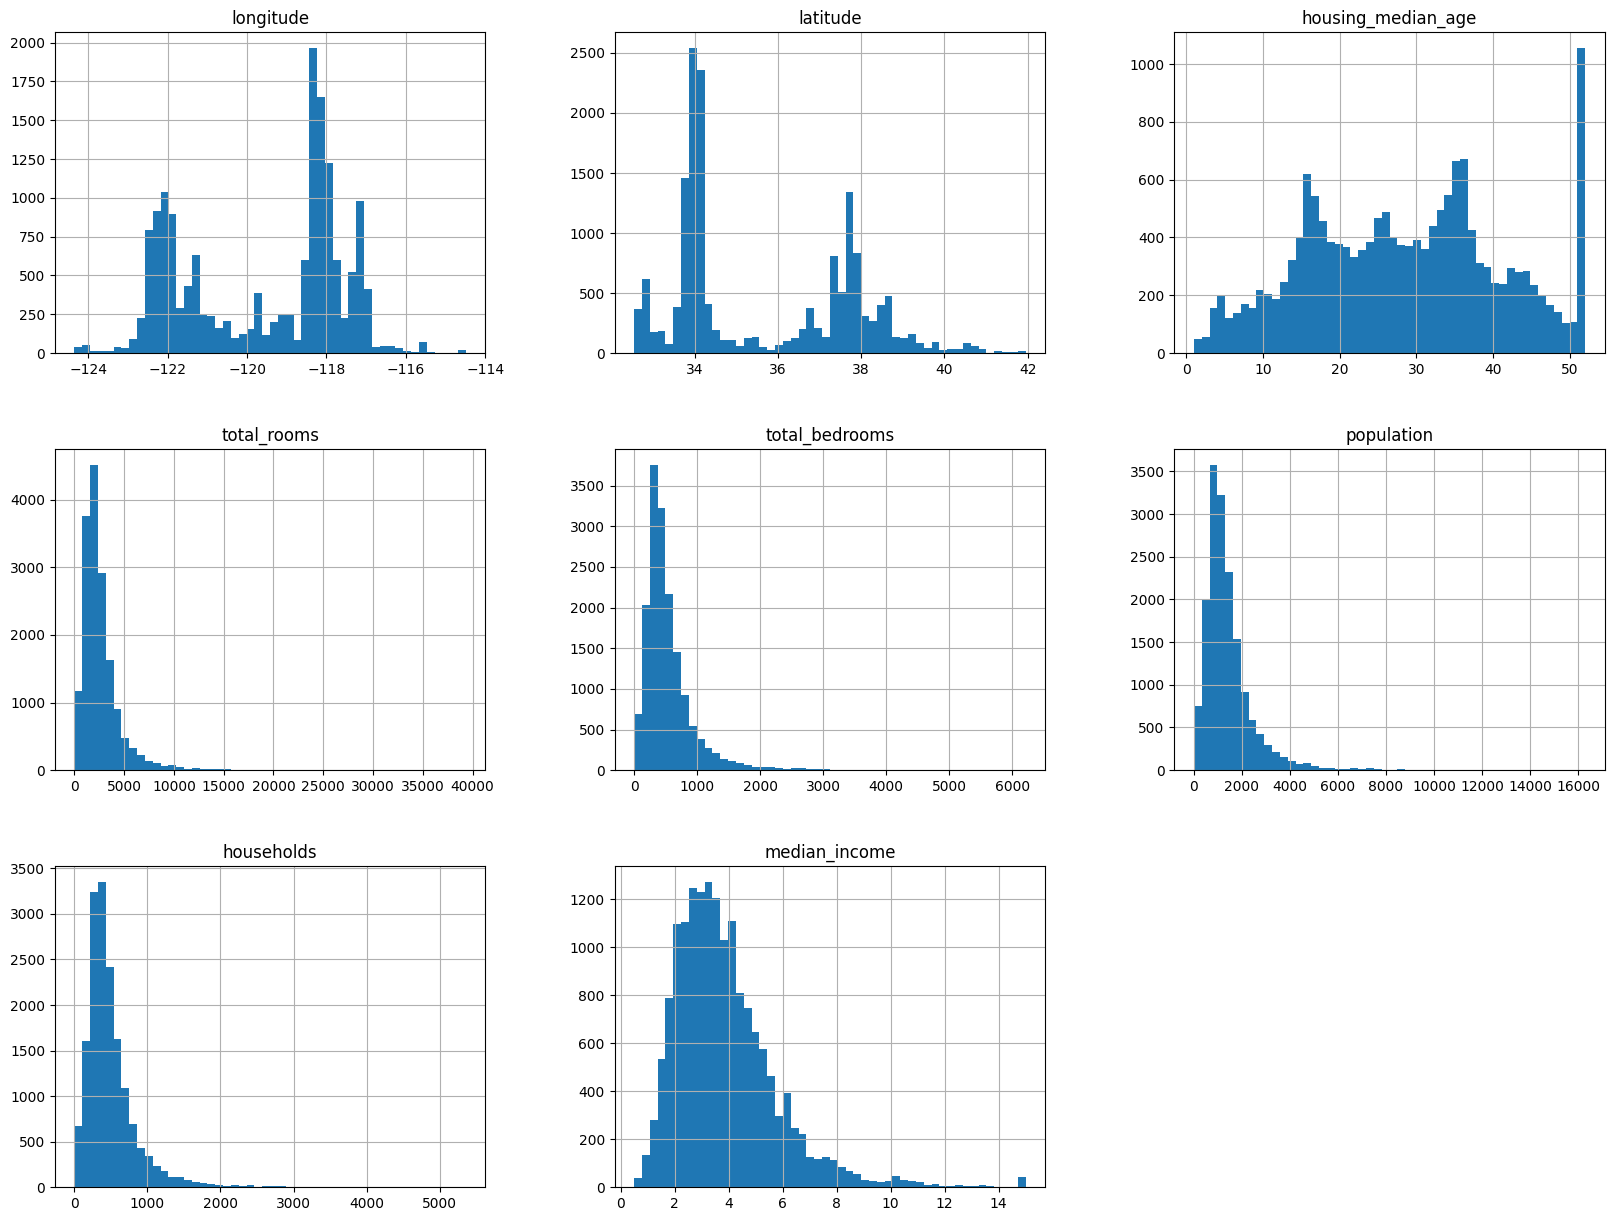

In [197]:
housing_numerical.hist(bins=50, figsize=(20,15))

In [198]:
# pipeline for numerical transformation
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('standardize', StandardScaler())
])

In [199]:
housing_num_prepared = num_pipeline.fit_transform(housing_numerical)

In [200]:
housing_num_prepared[:2].round(2)

array([[-0.84,  1.08,  1.22, -0.83, -0.83, -0.68, -0.82, -1.12],
       [ 1.2 , -1.33, -0.69,  0.08,  0.04,  0.36,  0.09, -0.21]])

In [201]:
num_pipeline.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [202]:
#convert to a nice dataframe
housing_num_prepared_df = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_numerical.index)

In [203]:
housing_num_prepared_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20217,-0.842465,1.083203,1.219438,-0.827817,-0.834710,-0.679833,-0.822864,-1.122817
17424,1.202767,-1.331896,-0.686658,0.081374,0.035549,0.356772,0.090034,-0.213263
7308,0.707711,-0.755086,1.298859,-0.793858,-0.724164,-0.455310,-0.722006,-0.664705
12266,0.562694,-0.755086,0.981176,-0.637195,-0.514831,-0.649051,-0.509945,-0.277040
2244,-1.337521,1.153546,1.854803,-0.478267,-0.392524,-0.553086,-0.372881,-0.906006


In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
targetScaler = StandardScaler()
scaledLabels = targetScaler.fit_transform(housing_labels.to_frame())
scaledLabels

array([[-1.27317118],
       [-0.42594232],
       [-0.5345393 ],
       ...,
       [ 2.52514628],
       [-1.25679544],
       [ 0.26097671]], shape=(16512, 1))

In [206]:
model = LinearRegression()
model.fit(housing[['median_income']], scaledLabels)

LinearRegression()

In [207]:
newData = housing[['median_income']].iloc[:5]
newData

,median_income
20217,1.7250
17424,3.4706
7308,2.6042
12266,3.3482
2244,2.1411


In [208]:
model.predict(newData)

array([[-0.77665384],
       [-0.14751427],
       [-0.4597774 ],
       [-0.19162901],
       [-0.62668536]])

In [209]:
targetScaler.inverse_transform(model.predict(newData))

array([[116908.5835579 ],
       [189904.7027294 ],
       [153674.2732781 ],
       [184786.27640803],
       [134308.72401807]])

In [210]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 20217 to 15851
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16338 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [211]:
#single transformer to handle both categorical and numerical columns
"""Use ColumnTransformer == it apply num and cat pipeline"""
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attributes = ["longitude", "latitude", "housing_median_age", "total_rooms",
                  "total_bedrooms", "population", "households", "median_income"]
cat_attributes = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes),
])

In [212]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared

array([[-0.84246504,  1.08320335,  1.21943816, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.20276693, -1.33189642, -0.68665785, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70771078, -0.75508618,  1.29885882, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.26751325,  0.81121153, -0.52781652, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.97785484, -1.21934808, -0.92491985, ...,  0.        ,
         0.        ,  0.        ],
       [-1.63255465,  1.30361052,  0.02812815, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 13))

In [213]:
preprocessing.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [

In [214]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.842465,1.083203,1.219438,-0.827817,-0.834710,-0.679833,-0.822864,-1.122817,0.0,1.0,0.0,0.0,0.0
1,1.202767,-1.331896,-0.686658,0.081374,0.035549,0.356772,0.090034,-0.213263,0.0,0.0,0.0,0.0,1.0
2,0.707711,-0.755086,1.298859,-0.793858,-0.724164,-0.455310,-0.722006,-0.664705,1.0,0.0,0.0,0.0,0.0
3,0.562694,-0.755086,0.981176,-0.637195,-0.514831,-0.649051,-0.509945,-0.277040,1.0,0.0,0.0,0.0,0.0
4,-1.337521,1.153546,1.854803,-0.478267,-0.392524,-0.553086,-0.372881,-0.906006,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.152761,-1.224038,-0.289555,-0.389521,-0.536000,-0.289635,-0.491842,0.053517,0.0,0.0,0.0,0.0,1.0
16508,-0.592437,1.162925,-1.719127,2.055968,1.761956,1.581686,1.587393,-0.016200,0.0,1.0,0.0,0.0,0.0
16509,-1.267513,0.811212,-0.527817,-0.529885,-0.808838,-0.821970,-0.812520,3.362374,0.0,0.0,0.0,1.0,0.0
16510,1.977855,-1.219348,-0.924920,-0.741788,-0.724164,-0.618270,-0.734936,-0.955402,0.0,1.0,0.0,0.0,0.0


In [215]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

### COmbine all together to make a single pipeline

1. Missing value - numerical feture -- median & categorical -- Most frequent
2. One hot for categorical
3. few more features - bedroom ration, roomperhouse, pplperhouse
4. long tail fetature replaced with log
5. numerical feature standardised

In [216]:
def column_ratio(X):
    return X[:, [0]] /X[:,[1]]

def ratio_name(function_transformer, feature_names_in):
    """TO give the feature names out"""
    return ['ration']


In [217]:
from sklearn.preprocessing import FunctionTransformer

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out = ratio_name),
        StandardScaler()
    )
    
    
    

In [218]:
# from sklearn.metrics.pairwise import ClusterSimilarity
from sklearn.preprocessing import FunctionTransformer

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

# cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)


preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_bedrooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "households", "population", "median_income"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
                remainder=default_num_pipeline                  )

In [219]:
housing_prepared = preprocessing.fit_transform(housing)

In [220]:
housing_prepared.shape

(16512, 16)

In [221]:
preprocessing.get_feature_names_out()

array(['bedrooms__ration', 'rooms_per_house__ration',
       'people_per_house__ration', 'log__total_bedrooms',
       'log__total_rooms', 'log__households', 'log__population',
       'log__median_income', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__longitude', 'remainder__latitude',
       'remainder__housing_median_age'], dtype=object)

In [222]:
from sklearn.linear_model import LinearRegression

linreg = make_pipeline(preprocessing, LinearRegression())
linreg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'households',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002132B34EC90>)])),
                ('linearregression', LinearRegression())])

In [223]:
linreg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'households',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002132B34EC90>)])),
                ('linearregression', LinearRegression())])

In [224]:
housingPred = linreg.predict(housing)
housingPred[:5].round(-2)

array([ 46500., 200000., 157800., 258200., 196200.])

In [225]:
housing_labels.iloc[:5].values

array([ 59300., 157600., 145000., 318100.,  97200.])

In [226]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(housing_labels, housingPred) ** 0.5
rmse

r2_score(housing_labels, housingPred)

0.6299963011457477

In [227]:
pd.Series(rmse).describe()

count        1.000000
mean     70575.799844
std               NaN
min      70575.799844
25%      70575.799844
50%      70575.799844
75%      70575.799844
max      70575.799844
dtype: float64

In [228]:
from sklearn.tree import DecisionTreeRegressor

treereg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
treereg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'total_rooms', 'households',
                                                   'population',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002132B34EC90>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [229]:
housing_pred_tree = treereg.predict(housing)

In [230]:
r2_score(housing_labels, housing_pred_tree)

1.0

In [231]:
#CV
from sklearn.model_selection import cross_val_score

tree_rmse = -cross_val_score(treereg, housing, housing_labels, scoring='neg_root_mean_squared_error', cv=10)
tree_rmse

array([74583.94541864, 68611.15129132, 73263.72722155, 64488.58670948,
       70263.74958623, 66688.45586133, 73811.23019416, 70276.11393284,
       69823.29809712, 72704.14239442])

In [232]:
pd.Series(tree_rmse).describe()

count       10.000000
mean     70451.440071
std       3247.431111
min      64488.586709
25%      68914.187993
50%      70269.931760
75%      73123.831015
max      74583.945419
dtype: float64

In [233]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16338.000000,16512.000000,16512.000000,16512.000000
mean,-119.575261,35.640159,28.645833,2647.279978,540.013588,1427.921209,501.185744,3.879891
std,1.999834,2.132482,12.591562,2208.622993,427.290396,1104.601073,386.692492,1.919240
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.940000,18.000000,1449.000000,295.000000,786.750000,279.000000,2.562500
50%,-118.510000,34.260000,29.000000,2125.500000,433.000000,1166.000000,408.000000,3.538500
75%,-118.010000,37.720000,37.000000,3156.250000,647.000000,1724.000000,605.000000,4.743250
max,-114.490000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [234]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20217,-121.26,37.95,44.0,819.0,184.0,677.0,183.0,1.7250,INLAND
17424,-117.17,32.80,20.0,2827.0,554.0,1822.0,536.0,3.4706,NEAR OCEAN
7308,-118.16,34.03,45.0,894.0,231.0,925.0,222.0,2.6042,<1H OCEAN
12266,-118.45,34.03,41.0,1240.0,320.0,711.0,304.0,3.3482,<1H OCEAN
2244,-122.25,38.10,52.0,1591.0,372.0,817.0,357.0,2.1411,NEAR BAY


In [235]:
housing_prepared.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [239]:
X_test = strat_train_set.drop("median_house_value", axis=1)
y_test = strat_train_set['median_house_value'].copy()

finalPrediction = linreg.predict(X_test)
mean_squared_error(y_test, finalPrediction)**0.5

70575.79984364701

# Another Approach

In [240]:
pd.DataFrame(housing_labels)

,median_house_value
20217,59300.0
17424,157600.0
7308,145000.0
12266,318100.0
2244,97200.0
...,...
2688,215800.0
20136,130600.0
18739,500001.0
11072,61200.0


In [241]:
features_with_na = [feature for feature in housing.columns if housing[feature].isnull().sum() > 0]
#get the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(housing[feature].isnull().mean()*100, 4),  '% missing values')

total_bedrooms 1.0538 % missing values


In [242]:
housing.total_bedrooms.fillna(housing.total_bedrooms.mode()[0], inplace=True)

C:\Users\pkmis\AppData\Local\Temp\ipykernel_6016\1525294642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing.total_bedrooms.fillna(housing.total_bedrooms.mode()[0], inplace=True)


In [243]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [244]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [245]:
# no of rooms per house
housing['rooms_per_house'] = housing['total_rooms']/housing['households']
#number of bedrooms
housing['bedroom_ratio'] = housing['total_bedrooms']/housing['total_rooms']
# population per house
housing['people_per_house'] = housing['population']/housing['households']

In [246]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 20217 to 15851
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   rooms_per_house     16512 non-null  float64
 10  bedroom_ratio       16512 non-null  float64
 11  people_per_house    16512 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.6+ MB


In [247]:
housing.shape

(16512, 12)

In [248]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
20217,-121.26,37.95,44.0,819.0,184.0,677.0,183.0,1.7250,INLAND,4.475410,0.224664,3.699454
17424,-117.17,32.80,20.0,2827.0,554.0,1822.0,536.0,3.4706,NEAR OCEAN,5.274254,0.195967,3.399254
7308,-118.16,34.03,45.0,894.0,231.0,925.0,222.0,2.6042,<1H OCEAN,4.027027,0.258389,4.166667
12266,-118.45,34.03,41.0,1240.0,320.0,711.0,304.0,3.3482,<1H OCEAN,4.078947,0.258065,2.338816
2244,-122.25,38.10,52.0,1591.0,372.0,817.0,357.0,2.1411,NEAR BAY,4.456583,0.233815,2.288515


In [249]:
X = housing.drop('median_income', axis=1)
y = housing['median_income']

In [250]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
20217,-121.26,37.95,44.0,819.0,184.0,677.0,183.0,INLAND,4.475410,0.224664,3.699454
17424,-117.17,32.80,20.0,2827.0,554.0,1822.0,536.0,NEAR OCEAN,5.274254,0.195967,3.399254
7308,-118.16,34.03,45.0,894.0,231.0,925.0,222.0,<1H OCEAN,4.027027,0.258389,4.166667
12266,-118.45,34.03,41.0,1240.0,320.0,711.0,304.0,<1H OCEAN,4.078947,0.258065,2.338816
2244,-122.25,38.10,52.0,1591.0,372.0,817.0,357.0,NEAR BAY,4.456583,0.233815,2.288515


In [251]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 20217 to 15851
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
 8   rooms_per_house     16512 non-null  float64
 9   bedroom_ratio       16512 non-null  float64
 10  people_per_house    16512 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((13209, 11), (3303, 11))

In [253]:
cat_features = X.select_dtypes(include='O').columns
num_features = X.select_dtypes(exclude='O').columns
cat_features, num_features

(Index(['ocean_proximity'], dtype='object'),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'rooms_per_house',
        'bedroom_ratio', 'people_per_house'],
       dtype='object'))

In [254]:
#onehot encoder, standar scaler, column transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

"""Column Transformer -> Applies transformers to columns of an array or pandas DataFrame."""

numeric_transformer = StandardScaler()
onehot_encoder = OneHotEncoder(drop="first")  #drop first means 


preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", onehot_encoder, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [255]:
X_train = preprocessor.fit_transform(X_train)  #apply transformation in training dataset(fit_transform)

X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.44301614,
        -0.75840682,  0.00744505],
       [ 1.        ,  0.        ,  0.        , ...,  0.92186835,
        -0.67086195, -0.0896941 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.16780989,
        -0.5704858 , -0.03583817],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.24700977,
        -0.68040344, -0.05134613],
       [ 1.        ,  0.        ,  0.        , ...,  0.3351298 ,
         0.28766576, -0.07527205],
       [ 1.        ,  0.        ,  0.        , ...,  2.35102699,
        -0.49197819, -0.04454039]], shape=(13209, 14))

In [256]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,-0.092302,0.369479,-0.206730,-0.420383,-0.590988,-0.573221,-0.632481,0.443016,-0.758407,0.007445
1,1.0,0.0,0.0,0.0,-0.481963,1.315516,-1.000052,-0.551023,-0.686750,-0.913363,-0.838267,0.921868,-0.670862,-0.089694
2,0.0,0.0,0.0,0.0,0.886846,-0.768574,-1.317381,3.015810,2.648142,2.698445,2.784094,0.167810,-0.570486,-0.035838
3,0.0,0.0,0.0,0.0,0.776942,-0.909075,-0.206730,-0.532623,-0.681962,-0.632537,-0.695800,0.311846,-0.726355,0.013597
4,1.0,0.0,0.0,0.0,1.801051,-1.091725,-1.634710,-1.104402,-1.172739,-1.258139,-1.252477,1.666208,-0.350066,-0.058629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13204,0.0,0.0,0.0,0.0,-1.176359,0.795664,-0.841388,-0.330684,0.060189,-0.300737,0.122068,-0.710170,1.332299,-0.144668
13205,0.0,0.0,0.0,0.0,-1.176359,0.772247,-0.206730,0.785274,0.665880,0.858712,0.821212,-0.034232,-0.424839,-0.020440
13206,0.0,0.0,0.0,0.0,0.726986,-0.857558,1.221250,-0.393704,-0.547896,-0.594538,-0.548056,0.247010,-0.680403,-0.051346
13207,1.0,0.0,0.0,0.0,2.465473,-0.356440,-0.920720,-0.039044,0.122434,-0.385077,-0.257845,0.335130,0.287666,-0.075272


In [257]:
X_test = preprocessor.transform(X_test)   #apply transformation on test (transform)
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.367298,-0.707691,-1.000052,0.675334,0.017097,-0.010643,0.161642,0.688806,-1.349205,-0.073894
1,0.0,0.0,0.0,0.0,0.682025,-0.782624,0.110599,-0.308144,0.261288,1.139538,0.280365,-0.808830,1.925923,0.187321
2,0.0,0.0,0.0,0.0,-1.121407,0.753514,-1.079384,0.276975,0.036249,0.307256,0.137897,0.155838,-0.715395,0.019097
3,0.0,0.0,0.0,0.0,0.602094,-0.768574,-0.841388,3.168070,3.684759,2.318450,3.749705,-0.183054,0.088291,-0.140226
4,0.0,0.0,0.0,1.0,-1.176359,0.430363,-0.048065,0.235575,-0.303704,-0.789169,-0.600822,2.266299,-1.390019,-0.132249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,0.0,0.0,0.0,0.0,-1.196341,0.903381,-0.682723,0.683154,1.185386,0.610325,1.256529,-0.451296,0.627156,-0.127670
3299,0.0,0.0,0.0,0.0,0.622077,-0.735791,1.855908,-0.423143,-0.816028,-0.678878,-0.798693,1.218571,-1.665523,0.065414
3300,0.0,0.0,0.0,0.0,0.846881,-0.740474,0.507260,-0.831163,-0.954882,-0.953216,-0.991287,0.484327,-0.810005,0.020122
3301,0.0,0.0,0.0,0.0,-0.422015,-0.356440,-0.048065,0.101716,-0.138516,-0.033813,-0.094271,0.264412,-0.763882,-0.007594


In [258]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [259]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.3347
- Mean Absolute Error: 0.8905
- R2 Score: 0.5194
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4610
- Mean Absolute Error: 0.8977
- R2 Score: 0.4053


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.8366
- Mean Absolute Error: 1.3366
- R2 Score: 0.0898
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.8132
- Mean Absolute Error: 1.3223
- R2 Score: 0.0841


Ridge
Model performance for Training set
- Root Mean Squared Error: 1.3347
- Mean Absolute Error: 0.8905
- R2 Score: 0.5194
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4612
- Mean Absolute Error: 0.8977
- R2 Score: 0.4052


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.8214
- Mean Absolute Error: 0.5689
- R2 Score: 0.8180
-----------------------

In [276]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [277]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params)
                   
                   ]

In [278]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits


e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_par

---------------- Best Params for KNN -------------------
{'n_neighbors': 10}
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}


In [279]:
## Beginning Model Training
models = {
    
        "Random Forest Regressor": RandomForestRegressor(n_estimators=500, min_samples_split=2, max_features=5, max_depth=None, 
                                                     n_jobs=-1),
        "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

e:\CODING\Data Science\DataScience ML Scratch2025\DS from Scratch\myenv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: '<1H OCEAN'